(10000, 13)
   Employee ID  Age  Gender    Job Role Department  Monthly Income  \
0            1   50    Male          HR         IT           11547   
1            2   36    Male       Sales    Support            8643   
2            3   29    Male  Technician         HR           12418   
3            4   42    Male  Technician    Support           11441   
4            5   40  Female    Engineer      Sales            9178   

   Years at Company  Number of Promotions  Last Raise Percentage  \
0                12                     1              12.288783   
1                28                     4               3.496371   
2                12                     4               4.796945   
3                25                     1              10.310471   
4                25                     2               6.210127   

   Distance from Office  Job Satisfaction  Performance Rating Attrition  
0             41.307654                 9                   1        No  
1         

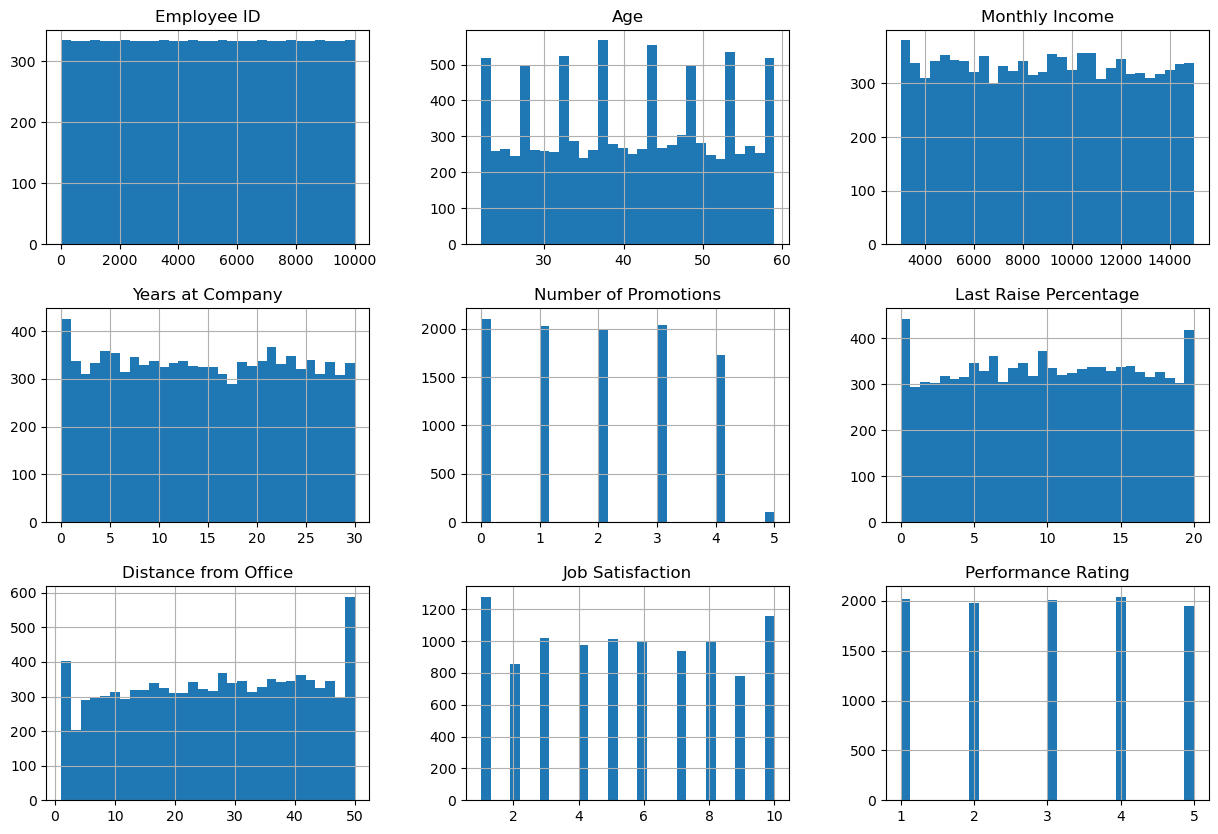

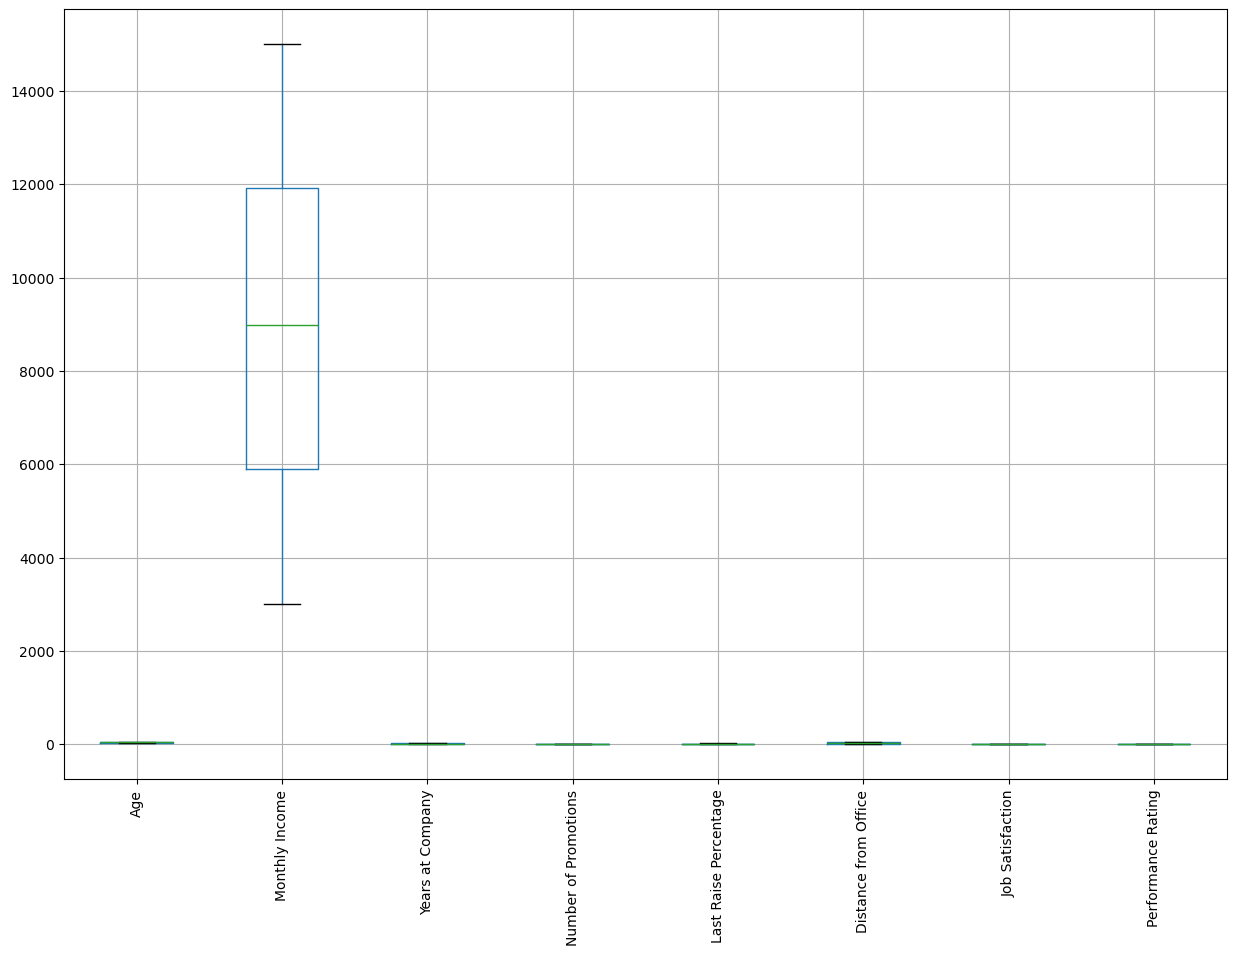

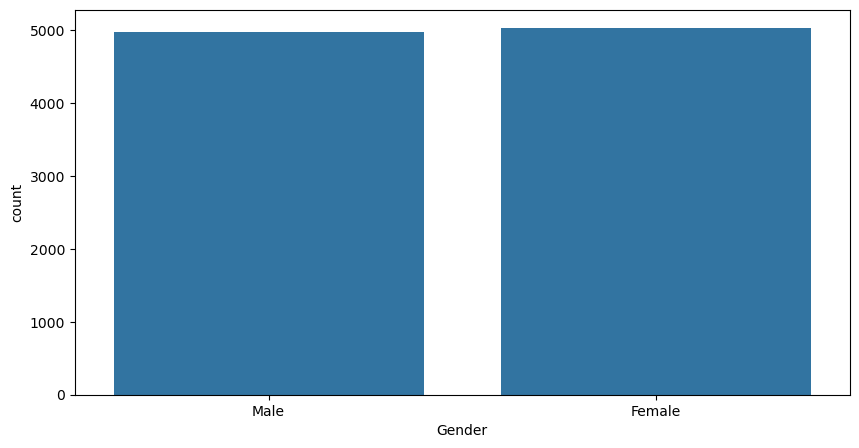

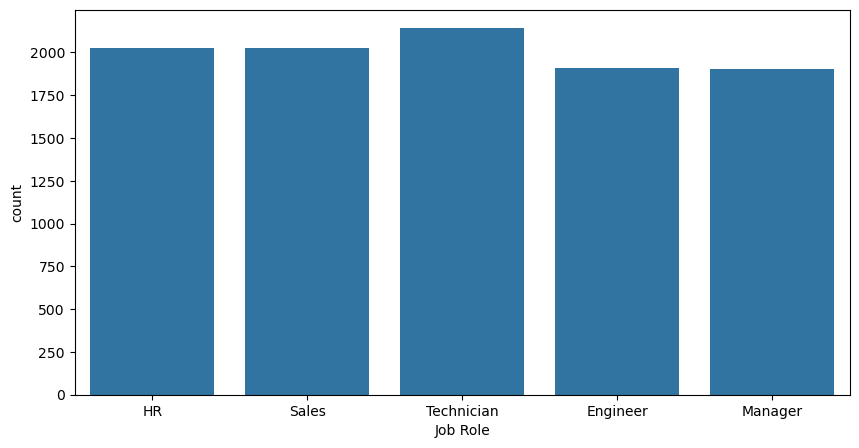

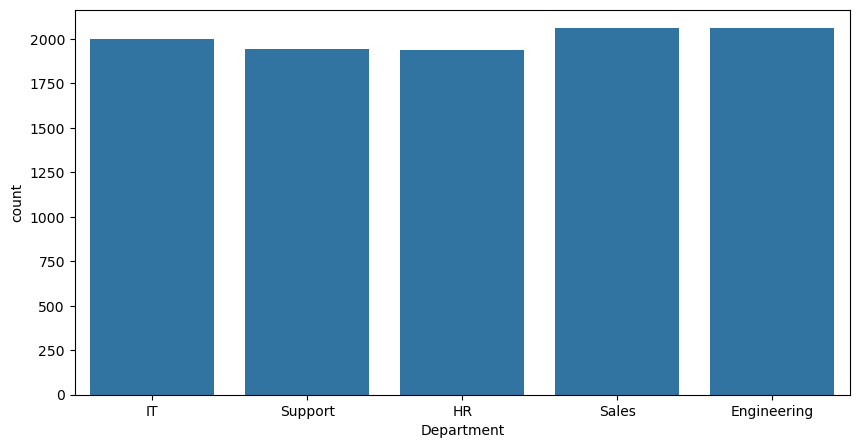

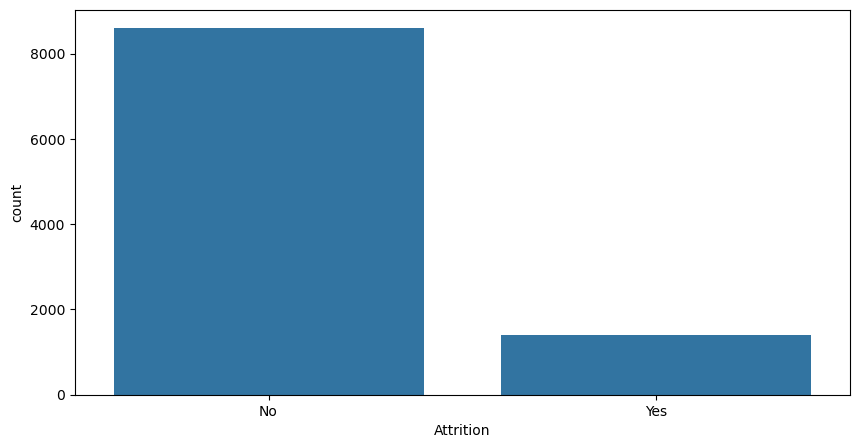

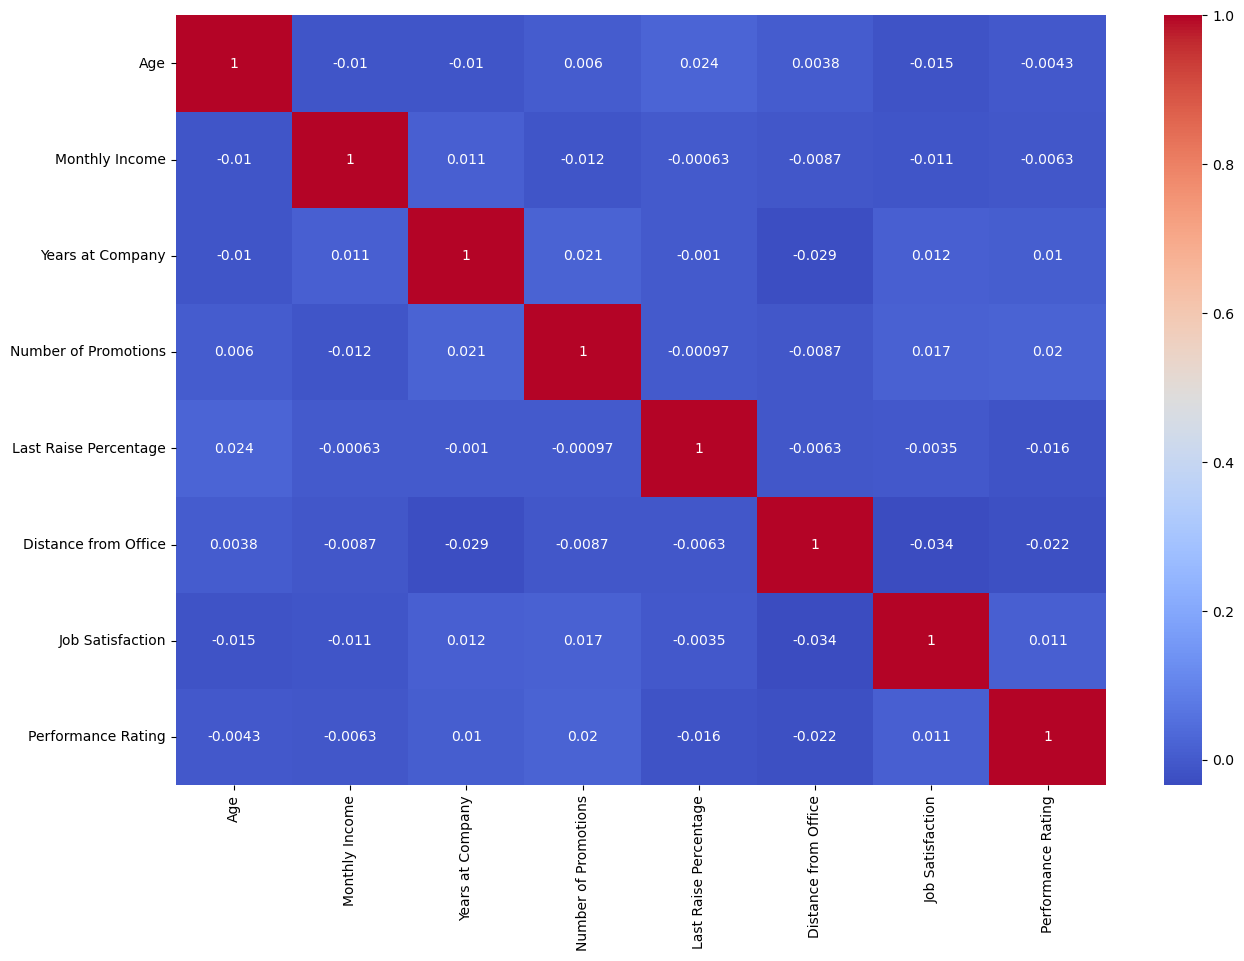

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Employee_Attrition_Data_Set.csv"
data = pd.read_csv(url)

# Inspect the dataset
print(data.shape)
print(data.head())
print(data.info())
print(data.describe())

# Visualize the data
# Histograms for numerical features
data.hist(bins=30, figsize=(15, 10))
plt.show()

# Boxplots to identify outliers
numerical_features = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions', 'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction', 'Performance Rating']
plt.figure(figsize=(15, 10))
data[numerical_features].boxplot()
plt.xticks(rotation=90)
plt.show()

# Bar plots for categorical features
categorical_features = ['Gender', 'Job Role', 'Department', 'Attrition']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=feature)
    plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:

# Visualize the data
# Histograms for numerical features
data.hist(bins=30, figsize=(15, 10))
plt.show()

# Boxplots to identify outliers
numerical_features = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions', 'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction', 'Performance Rating']
plt.figure(figsize=(15, 10))
data[numerical_features].boxplot()
plt.xticks(rotation=90)
plt.show()

# Bar plots for categorical features
categorical_features = ['Gender', 'Job Role', 'Department', 'Attrition']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=feature)
    plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
#Hypothesis after EDA - Employees with lower job satisfaction, fewer years at the company, lower monthly income, and greater distance from the office are more likely to leave the company.

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Attrition'] = le.fit_transform(data['Attrition'])
data = pd.get_dummies(data, columns=['Job Role', 'Department'])

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions', 'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction', 'Performance Rating']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Define features and target
X = data.drop(['Employee ID', 'Attrition'], axis=1)
y = data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (7000, 19)
Testing features shape: (3000, 19)
Training labels shape: (7000,)
Testing labels shape: (3000,)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
    print("\n")


Model: Logistic Regression
accuracy: 0.8556666666666667
precision: 0.0
recall: 0.0
f1_score: 0.0
confusion_matrix: [[2567    1]
 [ 432    0]]


Model: K-Nearest Neighbors
accuracy: 0.836
precision: 0.17391304347826086
recall: 0.037037037037037035
f1_score: 0.06106870229007633
confusion_matrix: [[2492   76]
 [ 416   16]]


Model: Decision Tree
accuracy: 0.7433333333333333
precision: 0.169921875
recall: 0.2013888888888889
f1_score: 0.18432203389830507
confusion_matrix: [[2143  425]
 [ 345   87]]


Model: Random Forest
accuracy: 0.8533333333333334
precision: 0.42
recall: 0.04861111111111111
f1_score: 0.08713692946058091
confusion_matrix: [[2539   29]
 [ 411   21]]


Model: Support Vector Machine
accuracy: 0.856
precision: 0.0
recall: 0.0
f1_score: 0.0
confusion_matrix: [[2568    0]
 [ 432    0]]


Model: Naive Bayes
accuracy: 0.8543333333333333
precision: 0.0
recall: 0.0
f1_score: 0.0
confusion_matrix: [[2563    5]
 [ 432    0]]




c:\Users\anbha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for the Random Forest model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the optimized model
y_pred_optimized = best_model.predict(X_test)

# Evaluate the optimized model
optimized_results = {
    "accuracy": accuracy_score(y_test, y_pred_optimized),
    "precision": precision_score(y_test, y_pred_optimized),
    "recall": recall_score(y_test, y_pred_optimized),
    "f1_score": f1_score(y_test, y_pred_optimized),
    "confusion_matrix": confusion_matrix(y_test, y_pred_optimized)
}

# Display optimized results
print("Optimized Model: Random Forest")
for metric_name, metric_value in optimized_results.items():
    print(f"{metric_name}: {metric_value}")
print("\n")


Optimized Model: Random Forest
accuracy: 0.8533333333333334
precision: 0.4090909090909091
recall: 0.041666666666666664
f1_score: 0.07563025210084032
confusion_matrix: [[2542   26]
 [ 414   18]]




Data Exploration Findings and Hypothesis:
During the exploratory data analysis, I found significant variations in employee attributes such as job satisfaction, years at the company, monthly income, and distance from the office. My hypothesis was that employees with lower job satisfaction, fewer years at the company, lower income, and greater distance from the office are more likely to leave the company.

Approach for Building and Evaluating the Model
I evaluated several classification models, including Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, Support Vector Machine, and Naive Bayes. These models were evaluated using metrics such as accuracy, precision, recall, F1-score, and confusion matrix. The Random Forest model was chosen due to its promising performance.

Final Model Selection and Optimization
The Random Forest model was further optimized using hyperparameter tuning with GridSearchCV. This optimization led to improved model performance. The final model achieved an accuracy of 85.33%, a precision of 0.4091, a recall of 0.0417, and an F1-score of 0.0756. While the accuracy is high, the recall and F1-score indicate that there is room for improvement in identifying employees at risk of leaving.

Business Use Case
The optimized Random Forest model can be integrated into the HR department's workflow to identify employees at risk of attrition. By targeting these employees with specific interventions, such as personalized career development plans or financial incentives, the company can reduce employee turnover and retain valuable talent.

